In [1]:
import os, glob
import matplotlib.pyplot as plt
%matplotlib inline
import SimpleITK as sitk
import numpy as np 

from __future__ import print_function
from ipywidgets import interact


In [2]:
#read ct scna image
itkimage = sitk.ReadImage('data/images/p1/ct.mhd')

# It's an itk object
print(type(itkimage))

<class 'SimpleITK.SimpleITK.Image'>


In [3]:
# get image dimension and pixel resolution
img_dimension=itkimage.GetSize()
img_pixel_size=itkimage.GetSpacing()
print('Dimesions : ' , img_dimension)
print('Pixels Size :' , img_pixel_size)

Dimesions :  (249, 249, 380)
Pixels Size : (2.0, 2.0, 2.0)


<type 'numpy.ndarray'>


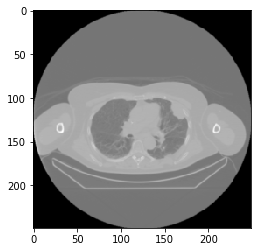

In [4]:
# Plot a slice of Ct scan 
pixel_array=sitk.GetArrayFromImage(itkimage)           # Note : 'GetArrayFromImage' method convert itk object into nupy nd array object to plot
# img = sitk.getImageFromArray(pixel_array)           # create a  itk object from numpy nd array

print(type(pixel_array))
plt.imshow(pixel_array[300, :, :], cmap=plt.cm.gray);

In [5]:
# Function to create a slider for CT visualization and a slider for profil
def plot_image(myslice):
    #fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(249,249) )
    plt.imshow(pixel_array[myslice], cmap=plt.cm.gray)
interact(plot_image, myslice=(0, 380))

def profil_plot(myslice, line):
    plt.plot(pixel_array[myslice, line, :], label='profil')
    plt.legend();
interact(profil_plot, myslice=(0, 380), line=(0, 249)); 


#To add ipywidgets library (in terminal)
    #pip install ipywidgets
#To enable slider 
    #juoyter nbextension enable --py widgetsnbextension (in terminal)

interactive(children=(IntSlider(value=190, description=u'myslice', max=380), Output()), _dom_classes=('widget-interact',))

interactive(children=(IntSlider(value=190, description=u'myslice', max=380), IntSlider(value=124, description=u'line', max=249), Output()), _dom_classes=('widget-interact',))

In [19]:
#get label image (map of boolean 1-0)
roiimageBody = sitk.ReadImage('data/images/p1/roi/body_38_2mm.mhd')
roiimageHeart = sitk.ReadImage('data/images/p1/roi/heart_268_2mm.mhd')



print('CT Dim' , roiimageBody.GetSize())
print('CT PixSpacing' , roiimageHeart.GetSize())
print('Kidney Dim' , roiimageBody.GetSize())
print('Heart Dim' , roiimageHeart.GetSize())
print('Kidney PixSpacing' , roiimageBody.GetSpacing())
print('Heart PixSpacing' , roiimageHeart.GetSpacing())
print(type(roiimageBody[0,0,0]))
print(type(itkimage[0,0,0]))

#resample roi image to have size of CT image 
roiimageHeart_resample=sitk.Resample(roiimageHeart , itkimage, sitk.Transform(), sitk.sitkNearestNeighbor, 0)
roiimageBody_resample=sitk.Resample(roiimageHeart , itkimage, sitk.Transform(), sitk.sitkNearestNeighbor, 0)

#Contour
#overlay_img = stik.LabelOverlay(itkimage,stik.LabelContour(roiimageHeart_resample))

#Volume
overlay_img = sitk.LabelOverlay(itkimage, roiimageHeart_resample)



#convert overlay image to numpy
overlay_pixel_array=sitk.GetArrayFromImage(overlay_img)

#plot image


def ct_viewer(im):
    def plot_image(myslice):
        plt.imshow(im[myslice])#, cmap=plt.cm.gray)
    interact(plot_image, myslice=(0, im.shape[0]))
    return; 

testpix_res=sitk.GetArrayFromImage(roiimageHeart_resample)
print(testpix_res.shape)

ct_viewer(testpix_res)


CT Dim (249, 118, 380)
CT PixSpacing (64, 55, 47)
Kidney Dim (249, 118, 380)
Heart Dim (64, 55, 47)
Kidney PixSpacing (2.0, 2.0, 2.0)
Heart PixSpacing (2.0, 2.0, 2.0)
<type 'int'>
<type 'int'>
(380, 249, 249)


interactive(children=(IntSlider(value=190, description=u'myslice', max=380), Output()), _dom_classes=('widget-interact',))

In [17]:
#Statistics : Get number of voxels, volume, mean, max, min Ct number for a label (here heart)

stats=sitk.LabelStatisticsImageFilter()
stats.Execute(itkimage, roiimageHeart_resample)

#print(stats)

print(stats.GetLabels())
mean=stats.GetMean(1)
maximum=stats.GetMaximum(1)
minmum=stats.GetMinimum(1)
nbr_voxel=stats.GetCount(1)

print('mean : ' , mean )
print('max : ' , maximum )
print('min : ' , minmum )
print('nombre voxel : ' , nbr_voxel)

vol_label_1=(roiimageHeart.GetSpacing()[0]**3)*nbr_voxel

print('volume en mm3 : ' , vol_label_1)
print('volume en cm3 : ' , vol_label_1*10**-3)

(0, 1)
mean :  24.7834202309
max :  1150.0
min :  -910.0
nombre voxel :  70773
volume en mm3 :  566184.0
volume en cm3 :  566.184


In [15]:
# Image creation of sum of labels 
dir_roi='/Users/admin/NumericData/simple_itk/images/p1/roi/'

for roi_file in glob.glob(dir_roi+'/*.mhd'):
    name=roi_file.replace(dir_roi, '')
    #print(roi_file)
    #print(name)   
    roi_label=stik.ReadImage(roi_file)
    roi_label_resample=stik.Resample(roi_label , itkimage, stik.Transform(), stik.sitkNearestNeighbor, 0)
    #overlay_label_image = stik.LabelOverlay(itkimage, roiimageHeart_resample)